<a href="https://colab.research.google.com/github/Jozefina-Gramatikova/Find_the_handwritten_numbers/blob/main/heights_and_weghits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [4]:
data = pd.read_csv('/content/drive/MyDrive/exNB.csv', header=None)


In [5]:
data

,0,1,2
0,75.626754,181.704486,1.0
1,70.540408,176.177640,1.0
2,76.875023,178.667364,1.0
3,70.225610,157.504877,1.0
4,74.106298,168.525499,1.0
...,...,...,...
995,68.394140,141.464087,0.0
996,65.280727,138.177757,0.0
997,65.345827,135.199530,0.0
998,59.385331,152.598596,0.0


In [6]:
X = data.to_numpy()

In [7]:
X

array([[ 75.62675441, 181.70448626,   1.        ],
       [ 70.54040833, 176.17763989,   1.        ],
       [ 76.87502316, 178.66736388,   1.        ],
       ...,
       [ 65.34582701, 135.19952982,   0.        ],
       [ 59.38533074, 152.59859562,   0.        ],
       [ 68.708487  , 129.95783574,   0.        ]])

In [8]:
y = X[:, -1] #the last column

In [9]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [10]:
X=X[:,:-1] #from the beginning to the last one

In [11]:
X

array([[ 75.62675441, 181.70448626],
       [ 70.54040833, 176.17763989],
       [ 76.87502316, 178.66736388],
       ...,
       [ 65.34582701, 135.19952982],
       [ 59.38533074, 152.59859562],
       [ 68.708487  , 129.95783574]])

In [12]:
X[0][0]

75.62675441204772

In [13]:
y.shape

(1000,)

In [14]:
X.shape

(1000, 2)

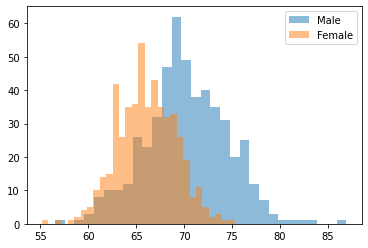

In [15]:
plt.figure()
plt.hist(X[y==1,0], label="Male", alpha=0.5, bins=30)
plt.hist(X[y==0,0], label="Female", alpha=0.5, bins=30)
plt.legend()

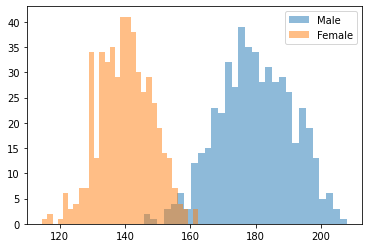

In [16]:
plt.figure()
plt.hist(X[y==1,1], label="Male", alpha=0.5, bins=30)
plt.hist(X[y==0,1], label="Female", alpha=0.5, bins=30)
plt.legend()

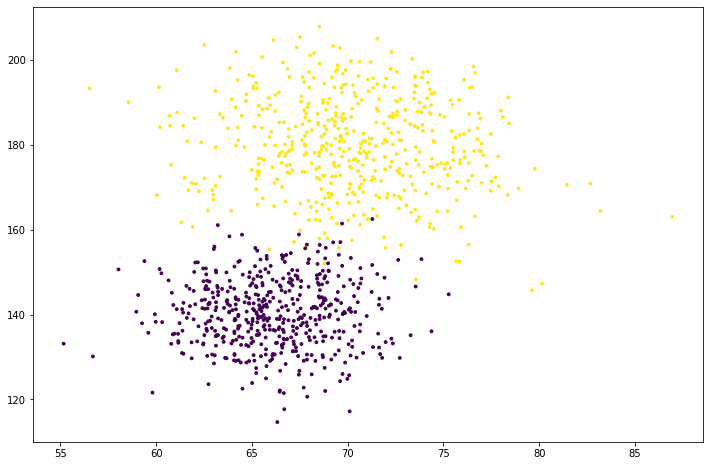

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1], c=y, s=8) #decision line, naive baise classifier

In [18]:
class GaussNB(): #Gaussian Naive Baise

  def fit(self, X, y, epsilon=1e-3): #the fit method X, y - test labels; self creates a global variable withing the class its like a memory
    self.likelihoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k,:] #we only want the class where y=k

      #we are going to populate our likelihoods
      self.likelihoods[k]={"mean": X_k.mean(axis=0), 'cov': X_k.var(axis=0)+ epsilon} #var=variance=sigma
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):

    N, D = X.shape
    P_hat = np.zeros((N, len(self.K))) #predicted probability
    
    for k,l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l['mean'], l['cov']+np.log(self.priors[k])) #probability density function

    return P_hat.argmax(axis=1)


In [19]:
gnb = GaussNB()

In [20]:
gnb.fit(X,y)


In [21]:
y_hat=gnb.predict(X)

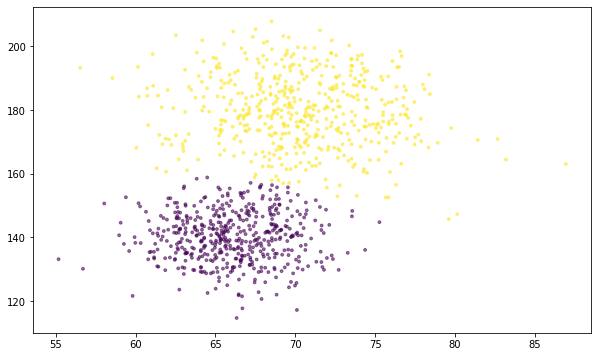

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y_hat, alpha = 0.55, s=8) #prediction

In [23]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [24]:
accuracy(y, y_hat)

0.986

In [25]:
"""Coinflip"""

def CoinFlip(y):
  y_hat=np.zeros(len(y)) #root golberg machine
  for i in range(len(y)):
    flip=np.random.randn(1)
    if flip>0:
      y_hat[i]=1

  return y_hat

In [26]:
y_not_hat = CoinFlip(y)

In [27]:
accuracy(y, y_not_hat)

0.517

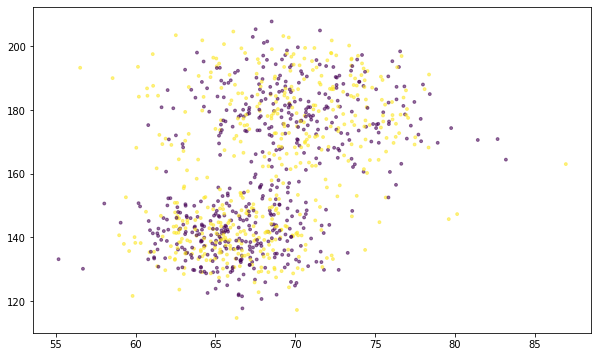

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y_not_hat, alpha = 0.55, s=8) #prediction

In [29]:
## Bayes Classifier (non naive)


In [30]:
class GaussBayes():

  def fit(self, X, y, epsilon= 1e-3): # epsilon - a small quantity that we can use to prevent division by zero

    self.likelihoods =dict()
    self.priors =dict()
    self.K= set(y.astype(int)) # the set of "y"s as type integer

    #we are going to set our covariance matrix in a different way
    for k in self.K: #for each class k 

      X_k = X[y==k, :]  # all the columns
      N_k, D = X_k.shape #N_k how many observations I have for this particular class, D-total number of columns (features)
      mu_k = X_k.mean(axis=0) #mean of all observations

 
      self.likelihoods[k] ={"mean": X_k.mean(axis=0), "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T, X_k-mu_k)+epsilon*np.identity(D)} 
      #self likelihoods of this particular class k, matmul - matrix multiplication
      #T-transpose; using the identity matrix because we need to add a value
      

      self.priors[k] = len(X_k)/len(X) # the propbability that we land on one of our classes

  
  def predict(self, X):  #let's predict

    N, D = X.shape 
    P_hat = np.zeros((N, len(self.K)))  # P_hat is first initialised as an empty array 

    for k, l in self.likelihoods.items():  
      P_hat[:,k]=mvn.logpdf(X,l["mean"], l["cov"])+np.log(self.priors[k]) 

      return P_hat.argmax(axis=1) #P_hat is the likelihood array - contains the likelihoods, and the maximum argument of those likelihoods will be our predicted class



In [31]:
data2 = pd.read_csv('/content/drive/MyDrive/xor.csv')

In [32]:
data2

,x1,x2,y
0,1.907567,0.325865,0
1,2.270544,2.258817,0
2,2.323086,1.466601,0
3,0.752419,2.684305,0
4,2.837229,2.238149,0
...,...,...,...
3995,2.274223,-2.579655,1
3996,1.541694,-1.140535,1
3997,3.059691,-2.873532,1
3998,3.525607,-2.331070,1


In [33]:
X2=data2.to_numpy()

In [34]:
X2

array([[ 1.90756726,  0.32586513,  0.        ],
       [ 2.27054368,  2.25881652,  0.        ],
       [ 2.32308573,  1.46660143,  0.        ],
       ...,
       [ 3.0596909 , -2.87353245,  1.        ],
       [ 3.52560718, -2.33106954,  1.        ],
       [ 1.72005898, -1.13464011,  1.        ]])

In [35]:
y2 = X2[:, -1] # all of the rows and just the final column

In [36]:
X2 = X2[:, 0 :-1] # all the rows withoout and all the columns without the last column



In [37]:
X2

array([[ 1.90756726,  0.32586513],
       [ 2.27054368,  2.25881652],
       [ 2.32308573,  1.46660143],
       ...,
       [ 3.0596909 , -2.87353245],
       [ 3.52560718, -2.33106954],
       [ 1.72005898, -1.13464011]])

In [38]:
y2

array([0., 0., 0., ..., 1., 1., 1.])

In [39]:
X.shape

(1000, 2)

In [40]:
X2.shape

(4000, 2)

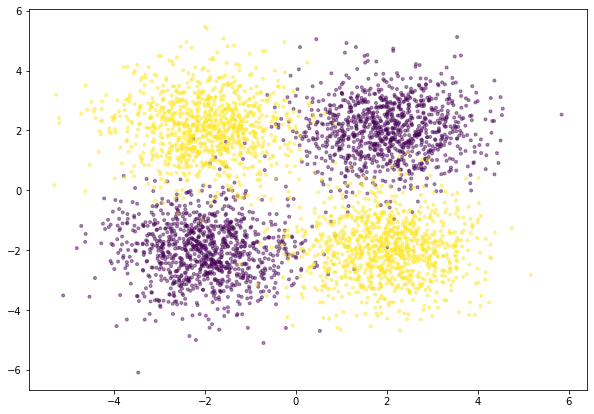

In [41]:
plt.figure(figsize=(10,7)) #very simple EDA
plt.scatter(X2[:,0],X2[:,1], alpha=0.45, c=y2, s=9) # all the rows in the dirst colums will be our x values and all the rows in the second column will be our y values; 
#colour is y2?, size of the markers=s

In [42]:
gnb.likelihoods

{0: {'cov': array([ 9.11683513, 65.26096123]),
  'mean': array([ 66.07741984, 140.19334781])},
 1: {'cov': array([ 18.24219346, 129.44756544]),
  'mean': array([ 70.23309181, 179.84174674])}}

In [43]:
gnb2 = GaussNB()

In [44]:
gnb2.fit(X2, y2)

In [45]:
y_hat_nb=gnb2.predict(X2)

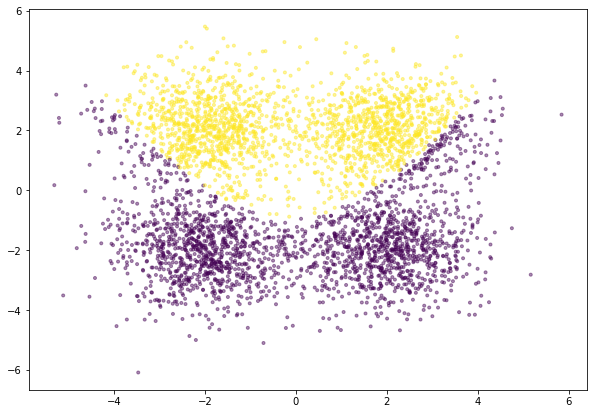

In [46]:
plt.figure(figsize=(10,7))
plt.scatter(X2[:,0],X2[:,1], alpha=0.45, c=y_hat_nb, s=9)

In [47]:
data3 = pd.read_csv('/content/drive/MyDrive/donut.csv', sep=" ",header=None )

In [48]:
data3.head()

,0,1,2
0,1.823942,-0.114612,0.0
1,0.750285,1.064485,0.0
2,1.577961,1.125408,0.0
3,0.393252,-0.547694,0.0
4,2.463079,-0.848993,0.0


In [49]:
X=data3.to_numpy()
y= X[:,-1]
X=X[:, :-1]

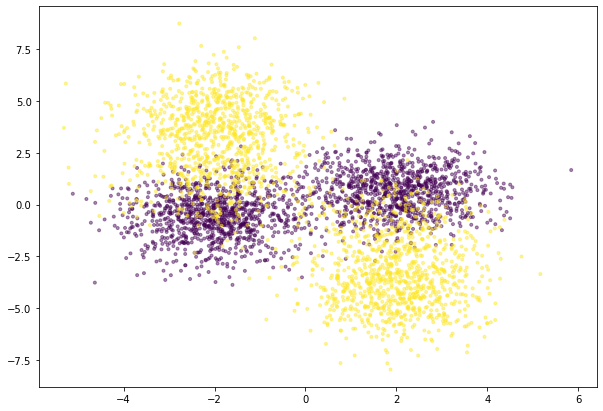

In [50]:
plt.figure(figsize=(10,7))
plt.scatter(X2[: ,0], X[:,1], alpha=0.45, c=y, s=9)

In [51]:
donut_nb=GaussNB()

In [52]:
donut_nb.fit(X,y)

In [53]:
y_hat = donut_nb.predict(X)

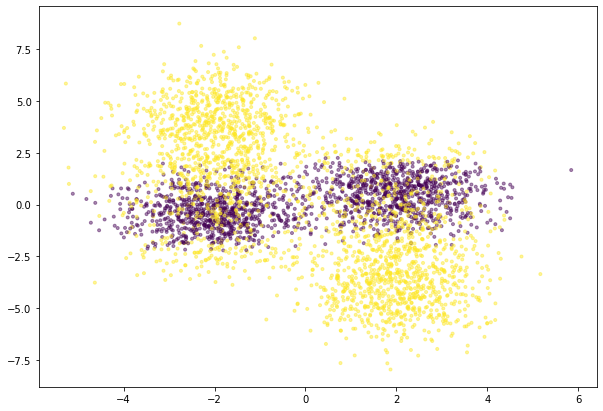

In [54]:
plt.figure(figsize=(10,7))
plt.scatter(X2[: ,0], X[:,1], alpha=0.45, c=y_hat, s=9)

In [55]:
accuracy(y,y_hat)

0.8945

In [56]:
donut_gb=GaussNB()

In [57]:
donut_gb.fit(X, y)

In [58]:
y_hat_gb=donut_gb.predict(X)

In [59]:
accuracy(y, y_hat_gb)

0.8945

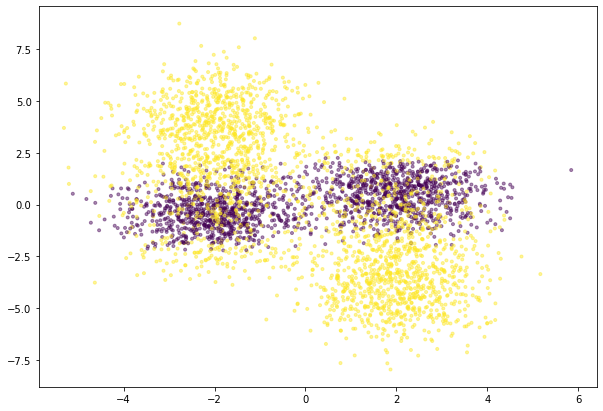

In [60]:
plt.figure(figsize=(10,7))
plt.scatter(X2[: ,0], X[:,1], alpha=0.45, c=y_hat_gb, s=9)